# User input

In [1]:
start_year_past = 2021
stop_year_past = 2040
start_year_future = 2041
stop_year_future = 2060

tuple_error_bar = ('pi',80)

# Import packages

In [2]:
from scipy import stats
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import gumbel_r
from scipy.stats import gumbel_l
import os
import os.path
import math
import seaborn as sns

from Functions_Indicators import add_year_month_season
#from Graphs_presentation_seaborn import trends_year

# Import data

## Temperature

In [3]:
out_path = r'\\COWI.net\projects\A245000\A248363\CRVA\Datasets\NEX-GDDP-CMIP6-AllMoz'
csv_path = os.path.join(out_path,'csv_file','tas','tas_Celsius_day_1950-2100','tas_1950-2100_projectsMoz.csv')
tas_clim_var = pd.read_csv(csv_path,header=[0],index_col=[0,1,2,3,4])

In [4]:
tas_clim_var

Date  \
Name project  Experiment Model      Latitude Longitude               
WTP_Mutua_EIB historical ACCESS-CM2 -19.375  34.625     01-01-1950   
                                             34.625     02-01-1950   
                                             34.625     03-01-1950   
                                             34.625     04-01-1950   
                                             34.625     05-01-1950   
...                                                            ...   
Pemba_EIB     ssp370     TaiESM1    -12.875  40.625     27-12-2100   
                                             40.625     28-12-2100   
                                             40.625     29-12-2100   
                                             40.625     30-12-2100   
                                             40.625     31-12-2100   

                                                        Daily Near-Surface Air Temperature °C  
Name project  Experiment Model      Latitude Longitude                                         
WTP_Mutua_EIB historical ACCESS-CM2 -19.375  34.625                                 30.038757  
                                             34.625                                 30.407043  
                                             34.625                                 30.592712  
                                             34.625                                 31.287659  
                                             34.625                                 25.517853  
...                                                                                       ...  
Pemba_EIB     ssp370     TaiESM1    -12.875  40.625                                 35.812469  
                                             40.625                                 35.473541  
                                             40.625                                 34.798248  
                                             40.625                                 33.925507  
                                             40.625                                 34.565887  

[8963100 rows x 2 columns]

In [5]:
tas_clim_var_without_index = tas_clim_var.reset_index()

# kill two models

tas_clim_var_without_index = tas_clim_var_without_index[tas_clim_var_without_index['Model']!='TaiESM1']
tas_clim_var_without_index = tas_clim_var_without_index[tas_clim_var_without_index['Model']!='CMCC-CM2-SR5']


tas_clim_var_without_index_gorongosa = tas_clim_var_without_index[tas_clim_var_without_index['Name project']=='Gorongosa_EIB']
tas_clim_var_without_index_gorongosa=add_year_month_season(tas_clim_var_without_index_gorongosa,'Date')

C:\Users\CLMRX\OneDrive - COWI\Documents\GitHub\CRVA_tool\Functions_Indicators.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = Year
C:\Users\CLMRX\OneDrive - COWI\Documents\GitHub\CRVA_tool\Functions_Indicators.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = Month
C:\Users\CLMRX\OneDrive - COWI\Documents\GitHub\CRVA_tool\Functions_Indicators.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [6]:
tas_clim_var_without_index_gorongosa=tas_clim_var_without_index_gorongosa.drop(['Name project','Latitude','Longitude'],axis=1)

In [7]:
tas_clim_var_without_index_gorongosa

,Experiment,Model,Date,Daily Near-Surface Air Temperature °C,Year,Month,Season
2240775,historical,ACCESS-CM2,01-01-1950,29.415863,1950,Jan,Humid
2240776,historical,ACCESS-CM2,02-01-1950,29.171539,1950,Jan,Humid
2240777,historical,ACCESS-CM2,03-01-1950,29.197357,1950,Jan,Humid
2240778,historical,ACCESS-CM2,04-01-1950,29.875763,1950,Jan,Humid
2240779,historical,ACCESS-CM2,05-01-1950,24.841461,1950,Jan,Humid
...,...,...,...,...,...,...,...
4450134,ssp370,NorESM2-MM,27-12-2100,32.839813,2100,Dec,Humid
4450135,ssp370,NorESM2-MM,28-12-2100,32.335846,2100,Dec,Humid
4450136,ssp370,NorESM2-MM,29-12-2100,32.511200,2100,Dec,Humid
4450137,ssp370,NorESM2-MM,30-12-2100,32.373383,2100,Dec,Humid


We saw in another Python notebook that model 'TAIESM1' and 'CMCC-CM2-SR5'

## Temperature maximum

In [8]:
out_path = r'\\COWI.net\projects\A245000\A248363\CRVA\Datasets\NEX-GDDP-CMIP6-AllMoz'
csv_path = os.path.join(out_path,'csv_file','tasmax','tasmax_Celsius_day_1950-2100','tasmax_1950-2100_projectsMoz.csv')
tasmax_clim_var = pd.read_csv(csv_path,header=[0],index_col=[0,1,2,3,4])
tasmax_clim_var_without_index = tasmax_clim_var.reset_index()
tasmax_clim_var_without_index_gorongosa = tasmax_clim_var_without_index[tasmax_clim_var_without_index['Name project']=='Gorongosa_EIB']
tasmax_clim_var_without_index_gorongosa=add_year_month_season(tasmax_clim_var_without_index_gorongosa,'Date')
tasmax_clim_var_without_index_gorongosa=tasmax_clim_var_without_index_gorongosa.drop(['Name project','Latitude','Longitude'],axis=1)
tasmax_clim_var_without_index_gorongosa

C:\Users\CLMRX\OneDrive - COWI\Documents\GitHub\CRVA_tool\Functions_Indicators.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = Year
C:\Users\CLMRX\OneDrive - COWI\Documents\GitHub\CRVA_tool\Functions_Indicators.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = Month
C:\Users\CLMRX\OneDrive - COWI\Documents\GitHub\CRVA_tool\Functions_Indicators.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

,Experiment,Model,Date,Daily Maximum Near-Surface Air Temperature °C,Year,Month,Season
2091390,historical,ACCESS-CM2,01-01-1950,35.269379,1950,Jan,Humid
2091391,historical,ACCESS-CM2,02-01-1950,35.528870,1950,Jan,Humid
2091392,historical,ACCESS-CM2,03-01-1950,35.527130,1950,Jan,Humid
2091393,historical,ACCESS-CM2,04-01-1950,36.416931,1950,Jan,Humid
2091394,historical,ACCESS-CM2,05-01-1950,30.323273,1950,Jan,Humid
...,...,...,...,...,...,...,...
4182775,ssp370,TaiESM1,27-12-2100,34.998383,2100,Dec,Humid
4182776,ssp370,TaiESM1,28-12-2100,42.575562,2100,Dec,Humid
4182777,ssp370,TaiESM1,29-12-2100,43.275574,2100,Dec,Humid
4182778,ssp370,TaiESM1,30-12-2100,30.833649,2100,Dec,Humid


## Incremental air temperature change

In [9]:
#from Functions_Indicators import yearly_avg

In [10]:
def yearly_avg(df,title_column,climate_var_longName):
    df_yearly_avg = df.copy(deep =True)
    df_yearly_avg=df_yearly_avg.drop(['Date','Month','Season'],axis=1)
    try:
        try:
            old_title_column=df.filter(like=climate_var_longName, axis=1).columns[0]
        except:
            old_title_column=df.filter(like=climate_var_longName.capitalize(), axis=1).columns[0]
    except:
        old_title_column=df.filter(like=climate_var_longName.upper(), axis=1).columns[0]
    df_yearly_avg=df_yearly_avg.rename(columns={old_title_column:'Yearly average '+climate_var_longName})
    df_yearly_avg = df_yearly_avg.groupby(['Experiment','Model','Year']).mean() # .sum() for precipitaitonsum per year
    #df_yearly_avg = df_yearly_avg.groupby(['Name project','Experiment','Model']).mean()
    return df_yearly_avg

In [11]:
tas_yearly_avg=yearly_avg(tas_clim_var_without_index_gorongosa,'Daily Near-Surface Air Temperature °C','temperature')
tas_yearly_avg

Yearly average temperature
Experiment Model      Year                            
historical ACCESS-CM2 1950                   23.864192
                      1951                   23.243487
                      1952                   23.682020
                      1953                   23.113887
                      1954                   23.167121
...                                                ...
ssp585     NorESM2-MM 2096                   27.957476
                      2097                   29.012003
                      2098                   28.393526
                      2099                   28.864844
                      2100                   29.560559

[5317 rows x 1 columns]

<Axes: xlabel='Year', ylabel='Yearly average temperature'>

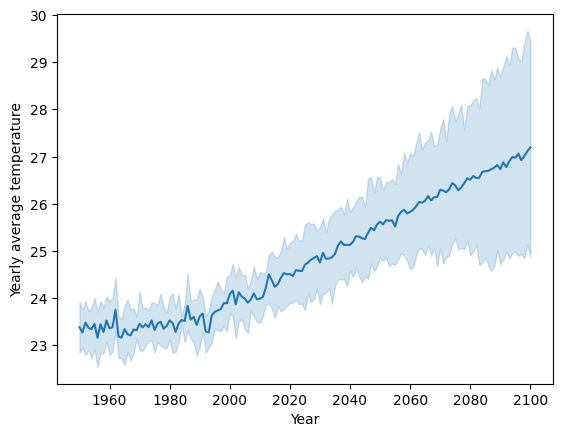

In [12]:
sns.lineplot(tas_yearly_avg,x='Year',y='Yearly average temperature',errorbar=tuple_error_bar)

In [13]:
tas_yearly_avg=tas_yearly_avg.reset_index()

Text(0.5, 1.0, 'Average yearly temperature °C, depending on scenario and\naccross models, between 1950 to 2100 at Gorongosa, MZ\ndata modeled with NEX-GDDP-CMIP6')

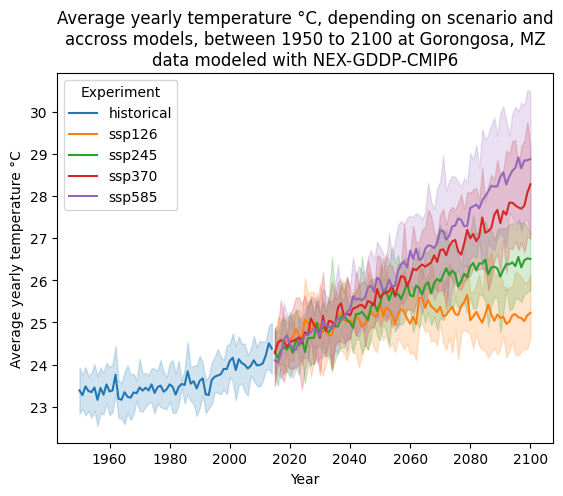

In [34]:
sns.lineplot(tas_yearly_avg,x='Year',y='Yearly average temperature',hue='Experiment',errorbar=tuple_error_bar)
plt.ylabel('Average yearly temperature °C')
plt.title('Average yearly temperature °C, depending on scenario and\naccross models, between 1950 to 2100 at Gorongosa, MZ\ndata modeled with NEX-GDDP-CMIP6')

## number of days with temperatures above 40 degres

In [15]:
def number_day_above_threshold(df,climate_var_longName,threshold):
    try:
        try:
            old_title_column=df.filter(like=climate_var_longName, axis=1).columns[0]
        except:
            old_title_column=df.filter(like=climate_var_longName.capitalize(), axis=1).columns[0]
    except:
        old_title_column=df.filter(like=climate_var_longName.upper(), axis=1).columns[0]
    new_name='Average annual number of days with '+climate_var_longName+' above '+str(threshold)
    #df = df.rename(columns={old_title_column:new_name})
    
    df = df.drop(['Date','Month','Season'],axis=1) 
    df=df.reset_index()
    #df=df.groupby(['Experiment','Model','Year']).apply(lambda x: x[x[new_name]>40].count()).reset_index()
    df[new_name]=0
    df[new_name].iloc[np.where(df[old_title_column]>40)[0]]=1    
    df = df.groupby(['Experiment','Model','Year'])[[new_name]].sum()
    
    return df

In [16]:
max_tas_over_40 = number_day_above_threshold(tasmax_clim_var_without_index_gorongosa,'temperature',40)
max_tas_over_40 

C:\Users\CLMRX\AppData\Local\Temp\1\ipykernel_24728\1807559999.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_name].iloc[np.where(df[old_title_column]>40)[0]]=1


Average annual number of days with temperature above 40
Experiment Model      Year                                                         
historical ACCESS-CM2 1950                                                  0      
                      1951                                                  0      
                      1952                                                  0      
                      1953                                                  0      
                      1954                                                  0      
...                                                                       ...      
ssp585     TaiESM1    2096                                                254      
                      2097                                                235      
                      2098                                                202      
                      2099                                                297      
                      2100                                                274      

[5726 rows x 1 columns]

In [17]:
max_tas_over_40 = max_tas_over_40.reset_index()

In [38]:
max_tas_over_40 = max_tas_over_40[max_tas_over_40['Model']!='TaiESM1']

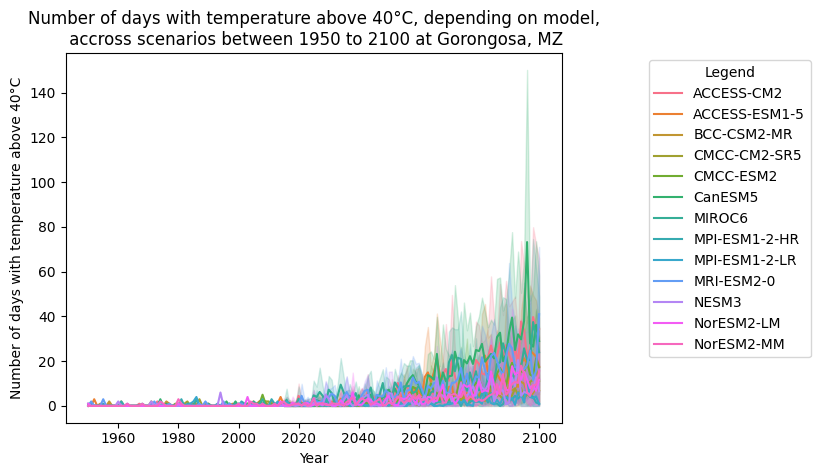

In [39]:
fig,ax = plt.subplots()
sns.lineplot(max_tas_over_40,x='Year',y='Average annual number of days with temperature above 40',hue='Model',errorbar=('pi',80))
plt.ylabel('Number of days with temperature above 40°C')
plt.title('Number of days with temperature above 40°C, depending on model,\n accross scenarios between 1950 to 2100 at Gorongosa, MZ')
handles, labels=ax.get_legend_handles_labels()
ax.get_legend().remove() # this line permits to have a common legend for the boxplots and the line
fig.legend(handles, labels, loc='upper right', ncol=1, bbox_to_anchor=(1.3, 0.88),title='Legend')

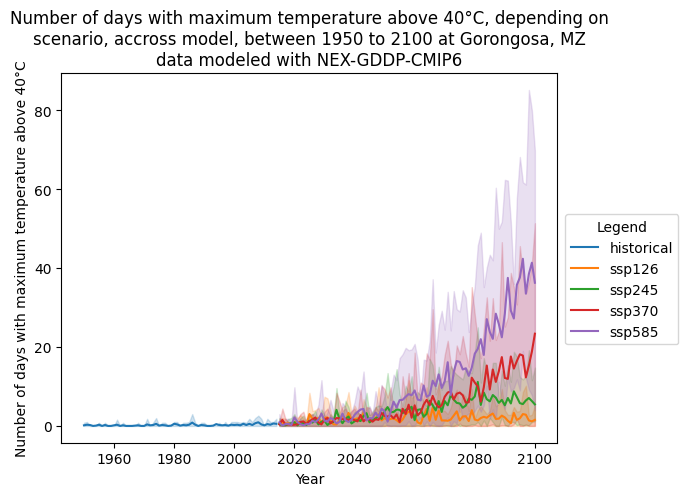

In [42]:
fig,ax = plt.subplots()
sns.lineplot(max_tas_over_40,x='Year',y='Average annual number of days with temperature above 40',hue='Experiment',errorbar=('pi',80))
#plt.ylim(0,100)
plt.ylabel('Number of days with maximum temperature above 40°C')
plt.title('Number of days with maximum temperature above 40°C, depending on\nscenario, accross model, between 1950 to 2100 at Gorongosa, MZ\ndata modeled with NEX-GDDP-CMIP6')
handles, labels=ax.get_legend_handles_labels()
ax.get_legend().remove() # this line permits to have a common legend for the boxplots and the line
fig.legend(handles, labels, loc='upper right', ncol=1, bbox_to_anchor=(1.1, 0.6),title='Legend')


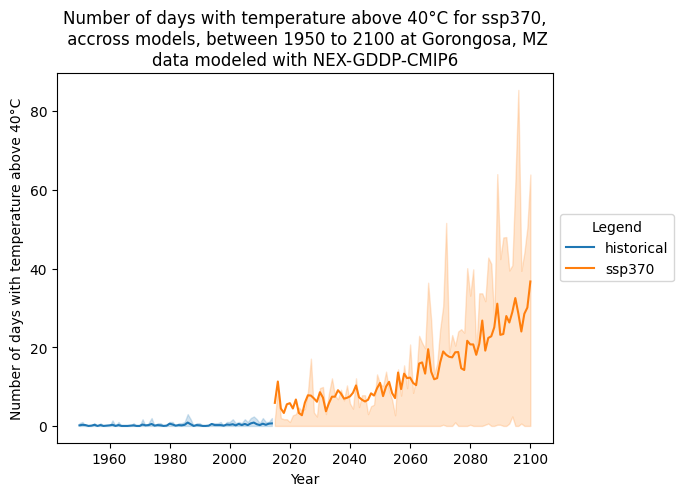

In [36]:
fig,ax = plt.subplots()
sns.lineplot(max_tas_over_40[(max_tas_over_40['Experiment']=='ssp370') | (max_tas_over_40['Experiment']=='historical')],x='Year',y='Average annual number of days with temperature above 40',hue='Experiment',errorbar=('pi',80))
plt.ylabel('Number of days with temperature above 40°C')
plt.title('Number of days with temperature above 40°C for ssp370,\n accross models, between 1950 to 2100 at Gorongosa, MZ\ndata modeled with NEX-GDDP-CMIP6')
handles, labels=ax.get_legend_handles_labels()
ax.get_legend().remove() # this line permits to have a common legend for the boxplots and the line
fig.legend(handles, labels, loc='upper right', ncol=1, bbox_to_anchor=(1.1, 0.6),title='Legend')

<Axes: xlabel='Year', ylabel='Average annual number of days with temperature above 40'>

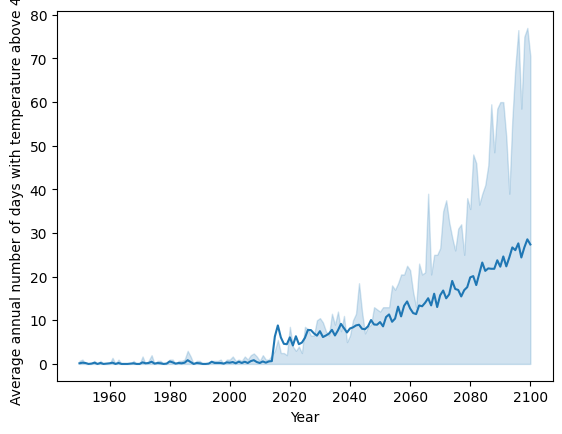

In [21]:
sns.lineplot(max_tas_over_40,x='Year',y='Average annual number of days with temperature above 40',errorbar=('pi',80))

In [22]:
max_tas_over_40=max_tas_over_40.reset_index()

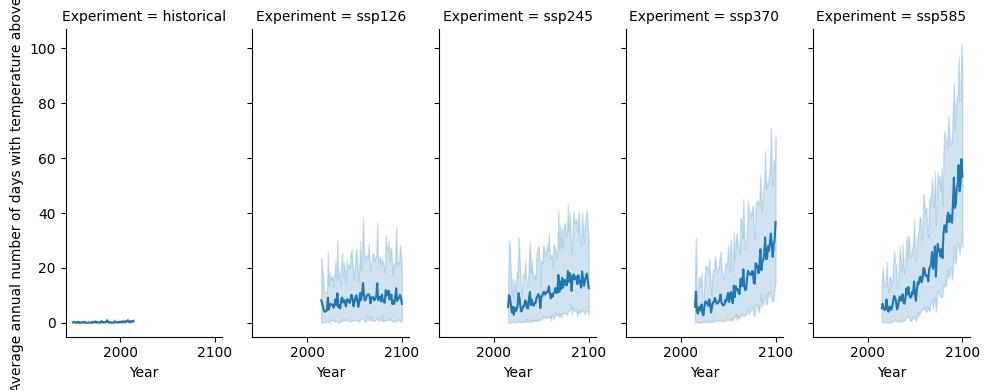

In [23]:
g = sns.FacetGrid(max_tas_over_40, col="Experiment", height=4, aspect=.5)
g.map(sns.lineplot, "Year",'Average annual number of days with temperature above 40')

## Maximum temperature in year

In [24]:
# mettre les max pour donnees

In [25]:
def max_per_year_for_each_model_ssp(df,climate_var_longName):
    try:
        try:
            old_title_column=df.filter(like=climate_var_longName, axis=1).columns[0]
        except:
            old_title_column=df.filter(like=climate_var_longName.capitalize(), axis=1).columns[0]
    except:
        old_title_column=df.filter(like=climate_var_longName.upper(), axis=1).columns[0]
    df = df.rename(columns={old_title_column:'Yearly maximum '+climate_var_longName})
    df = df.drop(['Date','Month','Season'],axis=1)
    df = df.groupby(['Experiment','Model','Year']).max()
    return df

In [26]:
df=max_per_year_for_each_model_ssp(tasmax_clim_var_without_index_gorongosa,'temperature')

In [27]:
df

Yearly maximum temperature
Experiment Model      Year                            
historical ACCESS-CM2 1950                   39.447235
                      1951                   35.787109
                      1952                   38.538177
                      1953                   36.170715
                      1954                   35.663239
...                                                ...
ssp585     TaiESM1    2096                   59.750885
                      2097                   54.554443
                      2098                   61.573547
                      2099                   59.428375
                      2100                   57.672882

[5726 rows x 1 columns]

<Axes: xlabel='Year', ylabel='Yearly maximum temperature'>

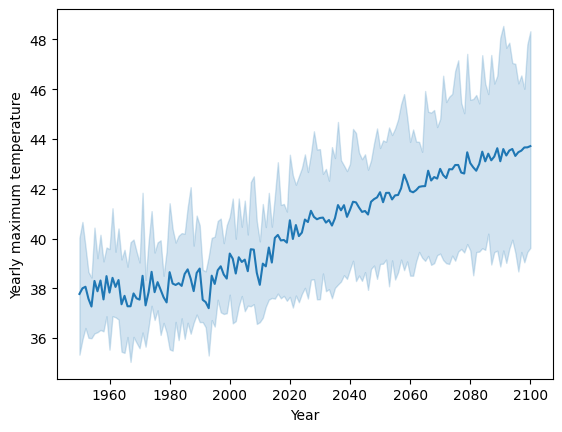

In [28]:
sns.lineplot(df,x='Year',y='Yearly maximum temperature',errorbar=('pi',80))

In [29]:
df=df.reset_index()

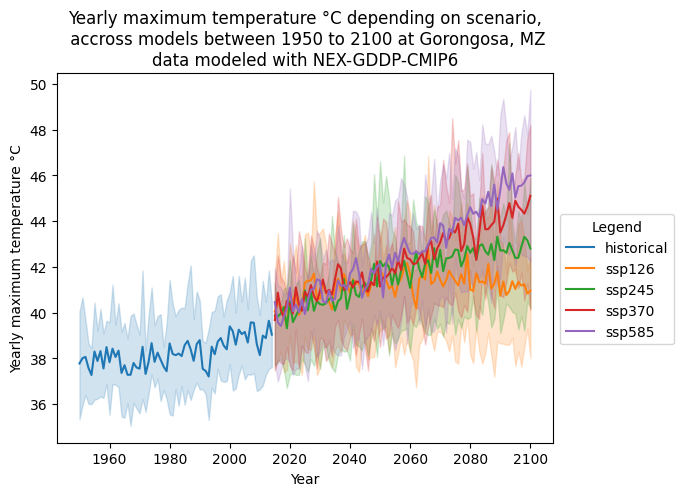

In [35]:
fig,ax = plt.subplots()
sns.lineplot(df,x='Year',y='Yearly maximum temperature',hue='Experiment',errorbar=('pi',80))# ajouter les donnes obs
plt.ylabel('Yearly maximum temperature °C')
plt.title('Yearly maximum temperature °C depending on scenario,\n accross models between 1950 to 2100 at Gorongosa, MZ\ndata modeled with NEX-GDDP-CMIP6')
handles, labels=ax.get_legend_handles_labels()
ax.get_legend().remove() # this line permits to have a common legend for the boxplots and the line
fig.legend(handles, labels, loc='upper right', ncol=1, bbox_to_anchor=(1.1, 0.6),title='Legend')

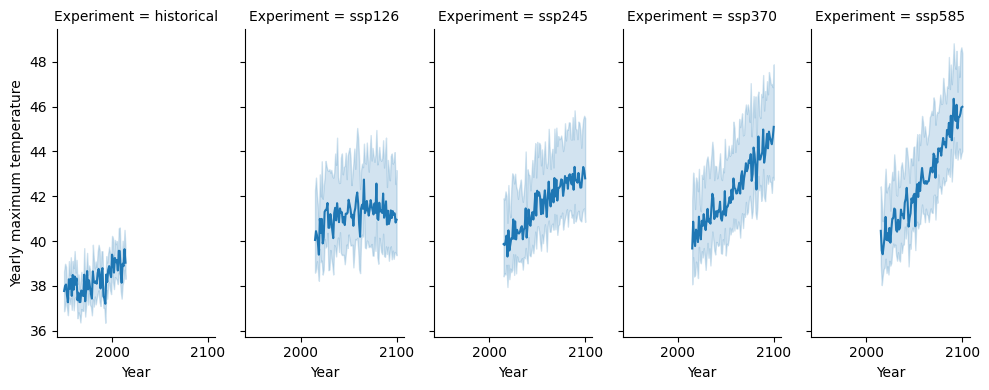

In [31]:
g = sns.FacetGrid(df, col="Experiment", height=4, aspect=.5)
g.map(sns.lineplot, "Year",'Yearly maximum temperature')

In [32]:
trends_year('tas',df,'NEX-GDDP-CMIP6','mean','gorongosa',1960,2100)

NameError: name 'trends_year' is not defined